In [2]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score 

In [4]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**Replace zero values with mean value**

In [5]:
zero_not_accepted = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for column in zero_not_accepted:
  df[column] = df[column].replace(0, np.NaN)
  mean = df[column].mean(skipna=True)
  df[column] = df[column].replace(np.NaN, mean)

**Split the data**

In [6]:
x = df.iloc[:, 0:8]
y = df.iloc[:, 8]

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0, test_size=0.2)

In [7]:
print(len(x_train), len(y_train), len(x_test), len(y_test))

614 614 154 154


**Scaling the data**

In [8]:
sc_X = StandardScaler()
x_train = sc_X.fit_transform(x_train)
x_test = sc_X.transform(x_test)

**Create KNN classifier**

In [49]:
classifier = KNeighborsClassifier(n_neighbors=11, p=2, metric='euclidean')

**Training the model**

In [50]:
classifier.fit(x_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=11)

In [57]:
y_pred = classifier.predict(x_test)
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

**Evaluate the trained model**

In [56]:
#confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[94 13]
 [16 31]]


Text(42.0, 0.5, 'Truth')

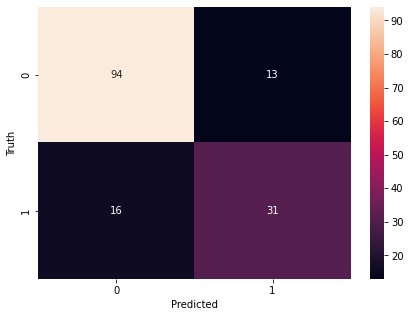

In [58]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7, 5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [53]:
#f1 score
print(f1_score(y_test, y_pred))

0.6813186813186813


In [54]:
#accuracy score
print(accuracy_score(y_test, y_pred))
#or
print(classifier.score(x_test, y_test))

0.8116883116883117
0.8116883116883117
